# Predicting Customer Churn using Machine Learning model

## ML model - Decision Tree Classifier with Grid Search & Cross-Validation

#### Objectives:

1. Load the dataset and perform data preprocessing
2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding
3. Perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?
4. Perform Grid Search and Cross-Validation with Decision Tree Classifier
5. Show a tree diagram of the Decision Tree
6. Show the Confusion Matrix, Classification report, and ROC-AUC
7. Explain accuracy, precision, recall, f1 score

### Necesssary Libraries importation

In [34]:
#Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100


import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [35]:
df = pd.read_csv("Churn.csv")

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


(3333, 21)


## Data Preprocessing

In [36]:
# we want to see if there are any problems with the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

 ##### We need to further investigate the object data types 

In [37]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


##### Rather than encoding, we will replace the categories with 0 & 1. It will save our computation. Moreover encoding for this dataset is a redundant approach #####

In [38]:
# we dont need state, area code or phone number
# to know a persons churning probability
# so drop them

df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

# now lets replace the object data inro 0 for no  and 1 for yes

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))

# finally lets see how our dataset looks like
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### Setting up the target variable

In [40]:
# check the target variable first
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [41]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)




#### Train - test separation

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Stratification for maintaing fixed ratio

In [43]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print('\nTrain Ratio:', train_ratio)


class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print('\nTest Ratio: ', test_ratio)


Train Ratio: 0.16942355889724312

Test Ratio:  0.1695906432748538


### Training: Decision Tree Classifier

In [44]:
model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)

#### Prediction

In [45]:
y_pred = model.predict(X_test)

####  Prediction Comparison with the test data

In [46]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
1620,0,0.0,0
2399,0,0.0,0
1569,0,0.0,0
2974,0,0.0,0
3291,1,1.0,1
1591,0,1.0,1
2063,0,0.0,0
1313,0,0.0,0
462,0,0.0,0
1679,1,1.0,1


In [47]:
# Concatenation

test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
1694,99,0,115.5,218.1,254.9,11.5,7,0,0,75,19.64,111,18.54,98,11.47,7,3.11,1,1.0,1
1973,85,21,283.2,239.7,149.5,6.3,5,0,1,110,48.14,108,20.37,80,6.73,1,1.70,0,0.0,0
2125,127,27,140.1,223.4,257.9,3.8,1,0,1,59,23.82,111,18.99,73,11.61,10,1.03,0,0.0,0
140,110,0,148.5,276.4,193.6,12.4,1,0,0,115,25.25,84,23.49,112,8.71,3,3.35,0,0.0,0
540,47,28,141.3,168.0,113.5,7.8,1,0,1,94,24.02,108,14.28,84,5.11,2,2.11,0,0.0,0
399,66,0,167.3,230.0,191.7,10.6,1,0,0,91,28.44,68,19.55,118,8.63,5,2.86,1,0.0,0
2370,85,0,183.4,168.8,199.7,9.9,4,0,0,111,31.18,98,14.35,97,8.99,4,2.67,0,0.0,0
2750,186,0,137.8,187.7,146.4,8.7,1,0,0,97,23.43,118,15.95,85,6.59,6,2.35,0,0.0,0
1343,73,0,254.7,90.2,153.4,10.6,0,0,0,80,43.30,79,7.67,60,6.90,8,2.86,0,1.0,1
2132,202,0,115.4,178.7,185.7,6.0,3,0,0,137,19.62,70,15.19,113,8.36,3,1.62,0,0.0,0


## Data Transformation 

### Standardization with StandardScaler    &   Normalization with MinMaxScaler

In [48]:
#Standardization
# scaler = StandardScaler() 


#Normalization
# scaler = MinMaxScaler()

# print(scaler.fit(test))


In [49]:
#Standardization
# print(scaler.mean_)

#Normalization
# print(scaler.data_max_) 

In [50]:
# print(scaler.transform(test.head(10)))

##### Even after applying both kinds of transformation, we didn't see any changes ie, Model Performance didn't improve.
#####  It is not necessary to standardize or normalize data for tree-based machine learning models, but it's a good practice.

## Tree diagram with Decision Tree Classifier


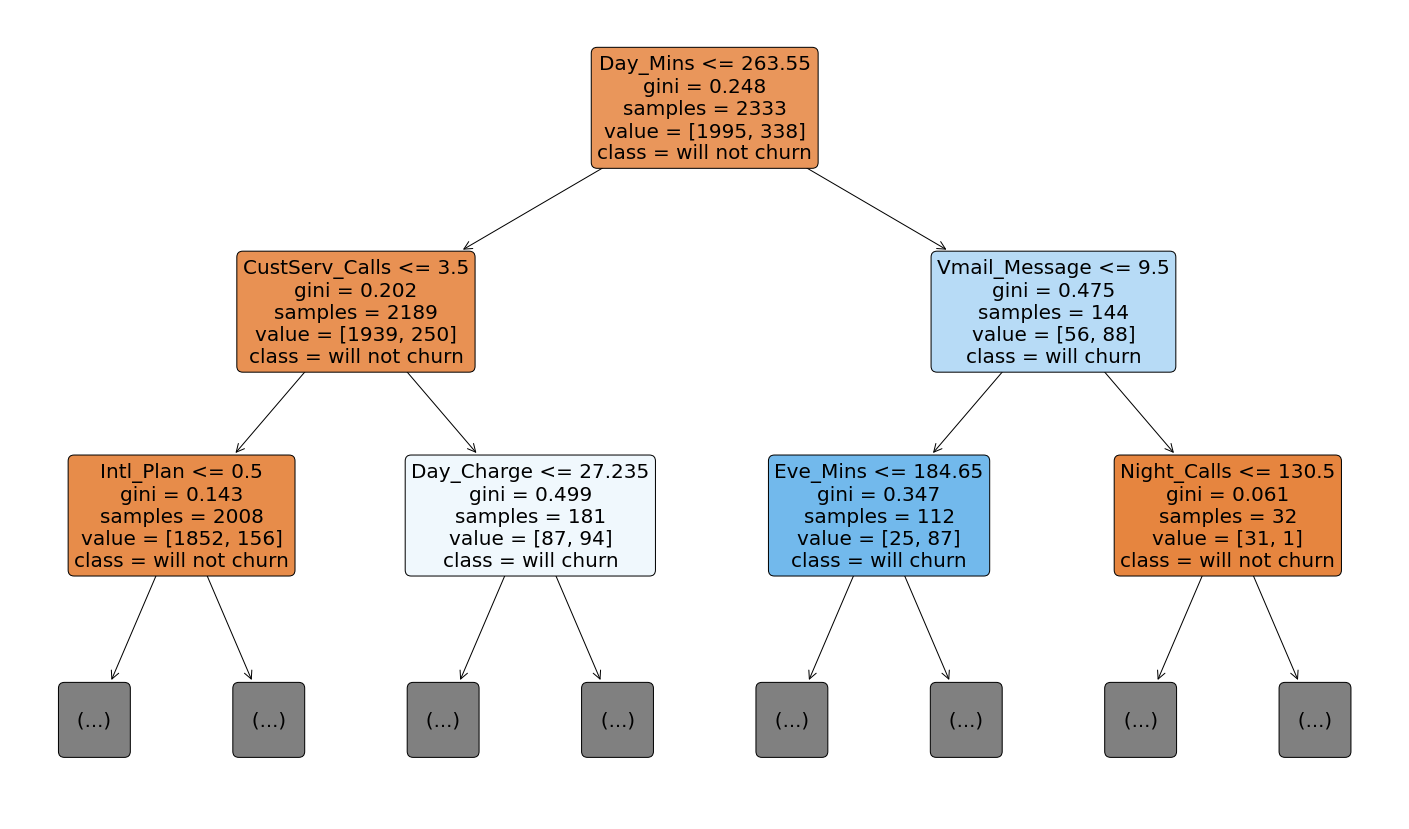

In [51]:
plt.figure(figsize = (25, 15))

plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=20)

plt.show()


## Grid Search and Cross Validation with Decision Tree Classifier

In [52]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(3,8,1).tolist(),
              'min_samples_leaf': np.arange(1, 3, 2).tolist()}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [53]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### Identifying hyperparameter 


In [54]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}

In [55]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.954936,0.920601,0.938276,0.013179,1
4,gini,7,0.940043,0.925054,0.929336,0.957082,0.937768,0.937856,0.011054,2
2,gini,5,0.937901,0.914347,0.946467,0.946352,0.942060,0.937425,0.011965,3
9,entropy,7,0.933619,0.927195,0.946467,0.931330,0.942060,0.936134,0.007088,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.937768,0.937768,0.933566,0.010728,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.894850,0.899142,0.901411,0.011525,9
5,entropy,3,0.886510,0.905782,0.907923,0.894850,0.873391,0.893691,0.012757,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


## Confusion Matrix

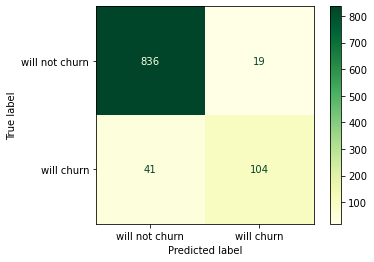

In [56]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='YlGn')
plt.show()

## ROC curve - AUC value

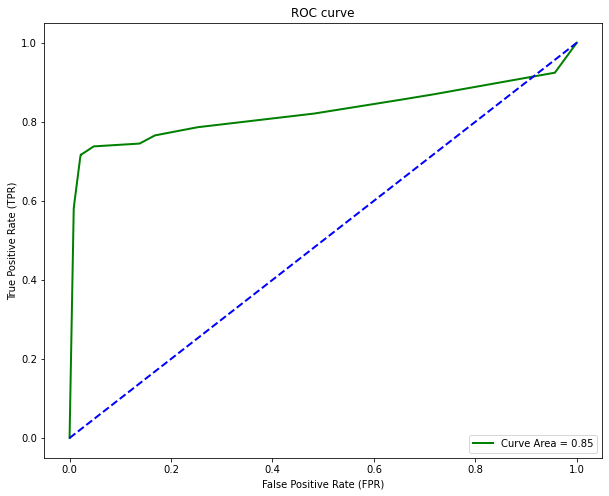

In [57]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Classification report

In [58]:
print(classification_report(y_test['Churn'], y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



## Accuracy

In [59]:
print('Accuracy:\n\t ', (accuracy_score(y_test['Churn'], y_pred)*100), '%')

Accuracy:
	  94.0 %


##### It indicates that our model can predict whether a customer will churn or not with 94% accuracy

## Precision

In [60]:
precision_ = np.round(precision_score(y_test['Churn'], y_pred), 2)

print("Precision:\n\t ", (precision_)*100, '%')

Precision:
	  85.0 %


##### Considering the True positives and False positives combined, let 100 positives combined, our model precisely predicted churning customers 85% times, ie 85 times. It's pretty good, in a positive way!

## Recall

In [61]:
recall_ = np.round(recall_score(y_test['Churn'], y_pred), 2)

print("Recall:\n\t ", (recall_)*100, '%')

Recall:
	  72.0 %


##### The amount of times our model recalled a churner correctly (not predicting "non-churners" as churners) is 72%. Room for improvement!

## f1 score

In [62]:
f1_score__ = np.round(f1_score(y_test['Churn'], y_pred), 2)

print("f1 score:\n\t ", (f1_score__)*100, '%')

f1 score:
	  78.0 %


##### f1   score of   78%   indicates that  our "CLASSIFIER"  measures 78%   in a scale of (0-100)%

### <i> > Our Model can predict a churning customer with 94% accuracy